In [6]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt

# 给定一张图像，随机调整图像的色彩。因为调整亮度、对比度、饱和度和色相的顺序会影响，最后的结果
def distort_color(image,color_ordering=0):
    if color_ordering == 0:
        image = tf.image.random_brightness(image,max_delta=32./255.)
        image = tf.image.random_saturation(image,lower=0.5,upper=1.5)
        image = tf.image.random_hue(image,max_delta=0.2)
        image = tf.image.random_contrast(image,lower=0.5,upper=1.5)
    elif color_ordering == 1:
        image = tf.image.random_saturation(image,lower=0.5,upper=1.5)
        image = tf.image.random_brightness(image,max_delta=32./255.)
        image = tf.image.random_contrast(image,lower=0.5,upper=1.5)
        image = tf.image.random_hue(image,max_delta=0.2)
    # 还可以定义其他的排列，不再一一列出   
    return tf.clip_by_value(image,0.0,1.0)

def preprocess_for_train(image,image_shape,bbox):
    # 如果没有提供标注框，则认为整个图像就是需要关注的部分
    if bbox is None:
        bbox = tf.constant([0.0,0.0,1.0,1.0],dtype=tf.float32,shape=[1,1,4])

    # 转换图像张量的类型
    if image.dtype != tf.float32:
        image = tf.image.convert_image_dtype(image,dtype=tf.float32)

    # 随机截取图像，减小需要关注的物体大小对图像识别算法的影响
    bbox_beign,bbox_size,_ = tf.image.sample_distorted_bounding_box(tf.shape(image),bounding_boxes=bbox,min_object_covered=0.1)
    bbox_begin, bbox_size, _ = tf.image.sample_distorted_bounding_box(tf.shape(image), bounding_boxes=bbox,min_object_covered=0.1)
    distorted_image = tf.slice(image,bbox_beign,bbox_size)

    # 将随机截取的图像调整为神经网络输入层的大小。大小调整的算法是随机选择
    distored_image = tf.image.resize_images(distorted_image,image_shape,method=np.random.randint(4))
    # 随机左右翻转图像
    distored_image = tf.image.random_flip_left_right(distored_image)
    # 使用一种随机的顺序调整图像色彩
    distored_image = distort_color(distorted_image,np.random.randint(2))

    return distored_image

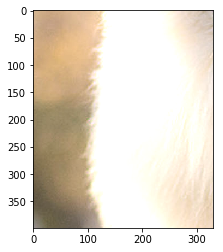

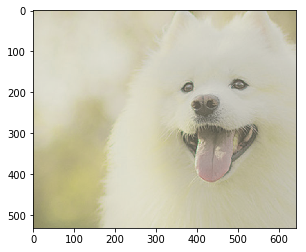

InvalidArgumentError: Expected size[0] in [0, 607], but got 926
	 [[Node: Slice_10 = Slice[Index=DT_INT32, T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](convert_image_11, sample_distorted_bounding_box_21/SampleDistortedBoundingBoxV2, sample_distorted_bounding_box_22/SampleDistortedBoundingBoxV2:1)]]

Caused by op 'Slice_10', defined at:
  File "/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-9aec455fd993>", line 7, in <module>
    result = preprocess_for_train(img_data,[299,299],boxes)
  File "<ipython-input-6-d973f1a5b5d7>", line 33, in preprocess_for_train
    distorted_image = tf.slice(image,bbox_beign,bbox_size)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 625, in slice
    return gen_array_ops._slice(input_, begin, size, name=name)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 4687, in _slice
    "Slice", input=input, begin=begin, size=size, name=name)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3160, in create_op
    op_def=op_def)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Expected size[0] in [0, 607], but got 926
	 [[Node: Slice_10 = Slice[Index=DT_INT32, T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](convert_image_11, sample_distorted_bounding_box_21/SampleDistortedBoundingBoxV2, sample_distorted_bounding_box_22/SampleDistortedBoundingBoxV2:1)]]


In [7]:
# 读取图片
image_raw_data = tf.gfile.FastGFile("dog.jpg","rb").read()
with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    boxes = tf.constant([[[0.05, 0.05, 0.9, 0.7], [0.35, 0.47, 0.5, 0.56]]])
    for i in range(8):
        result = preprocess_for_train(img_data,[299,299],boxes)
        plt.figure(1) 
        plt.imshow(result.eval())
        plt.show()